In [1]:
# necessary imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("D:\\EssexFiles\\Visualization\\37-00049_UOF-P_2016_prepped.csv")
# Delete the first row of the DataFrame
df = df.drop(df.index[0])

# Reset the index (optional)
df = df.reset_index(drop=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   INCIDENT_DATE                                 2383 non-null   object
 1   INCIDENT_TIME                                 2373 non-null   object
 2   UOF_NUMBER                                    2383 non-null   object
 3   OFFICER_ID                                    2383 non-null   object
 4   OFFICER_GENDER                                2383 non-null   object
 5   OFFICER_RACE                                  2383 non-null   object
 6   OFFICER_HIRE_DATE                             2383 non-null   object
 7   OFFICER_YEARS_ON_FORCE                        2383 non-null   object
 8   OFFICER_INJURY                                2383 non-null   object
 9   OFFICER_INJURY_TYPE                           2383 non-null   object
 10  

In [4]:
null_counts = df.isnull().sum()

# Printing the number of null values in each column
print(null_counts)

INCIDENT_DATE                                      0
INCIDENT_TIME                                     10
UOF_NUMBER                                         0
OFFICER_ID                                         0
OFFICER_GENDER                                     0
OFFICER_RACE                                       0
OFFICER_HIRE_DATE                                  0
OFFICER_YEARS_ON_FORCE                             0
OFFICER_INJURY                                     0
OFFICER_INJURY_TYPE                                0
OFFICER_HOSPITALIZATION                            0
SUBJECT_ID                                         0
SUBJECT_RACE                                      39
SUBJECT_GENDER                                    10
SUBJECT_INJURY                                     0
SUBJECT_INJURY_TYPE                                0
SUBJECT_WAS_ARRESTED                               0
SUBJECT_DESCRIPTION                               76
SUBJECT_OFFENSE                               

<Axes: >

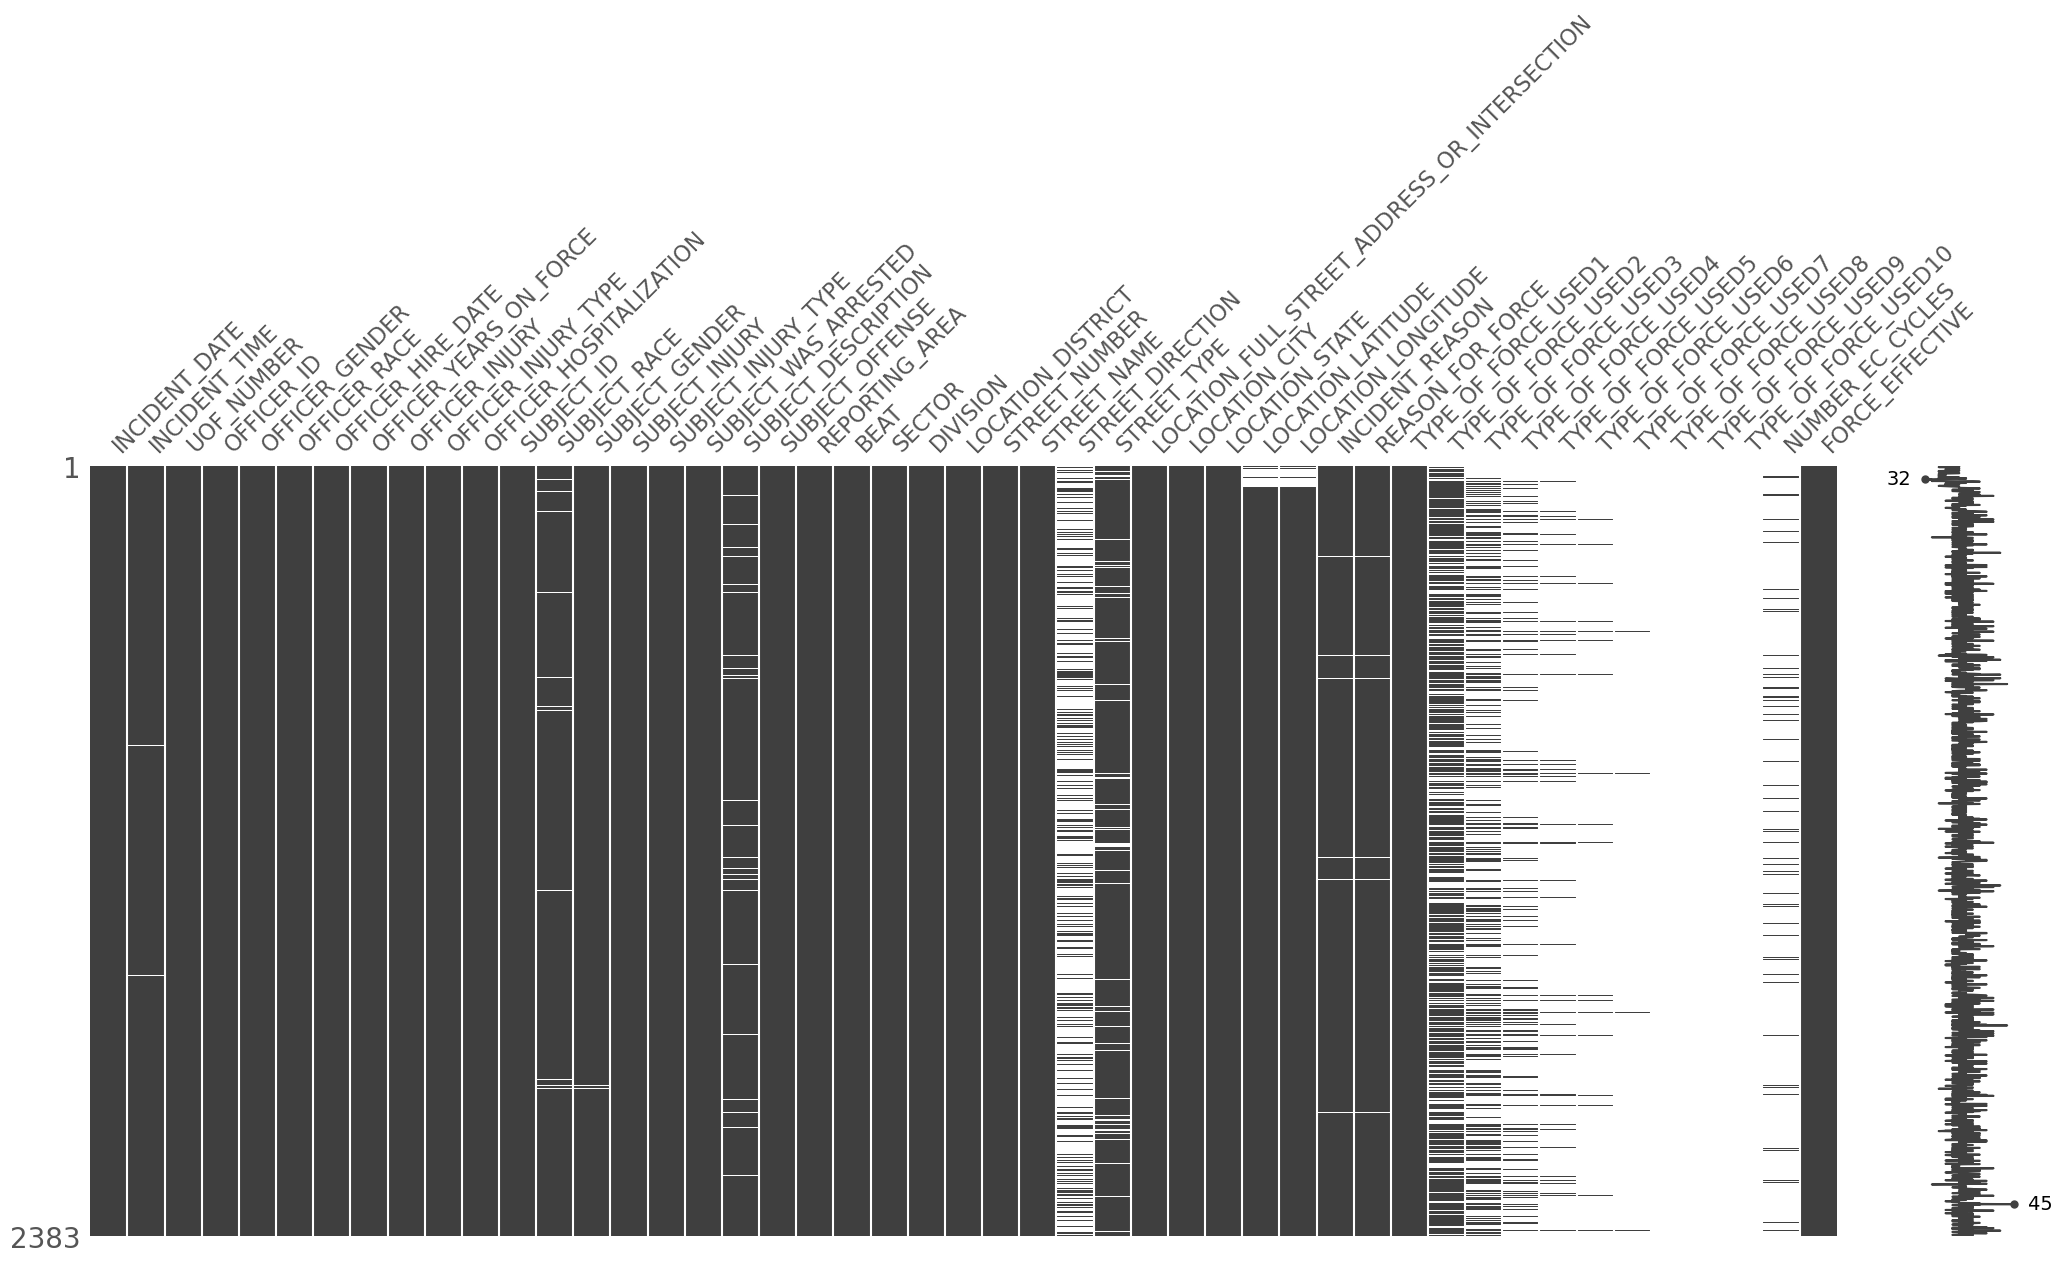

In [5]:
import missingno as msno

# Visualizing missing values
msno.matrix(df)

In [6]:
# Drop columns that are not needed
columns_to_drop = ['STREET_NUMBER','STREET_NAME','STREET_DIRECTION','STREET_TYPE','LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION','LOCATION_CITY','LOCATION_STATE','TYPE_OF_FORCE_USED3','TYPE_OF_FORCE_USED4','TYPE_OF_FORCE_USED5','TYPE_OF_FORCE_USED6','TYPE_OF_FORCE_USED7','TYPE_OF_FORCE_USED8','TYPE_OF_FORCE_USED9','TYPE_OF_FORCE_USED10','NUMBER_EC_CYCLES']  # List the column names to drop
df = df.drop(columns=columns_to_drop)

# Verify the updated DataFrame
df

     INCIDENT_DATE INCIDENT_TIME            UOF_NUMBER OFFICER_ID  \
0           9/3/16    4:14:00 AM                 37702      10810   
1          3/22/16   11:00:00 PM                 33413       7706   
2          5/22/16    1:29:00 PM                 34567      11014   
3          1/10/16    8:55:00 PM                 31460       6692   
4          11/8/16    2:30:00 AM          37879, 37898       9844   
...            ...           ...                   ...        ...   
2378        1/3/16    2:22:00 AM                 31204       9629   
2379        2/7/16    3:30:00 PM          32101, 32102       7683   
2380       1/28/16    6:30:00 AM          32018, 32019       9724   
2381        1/9/16    3:30:00 AM   31381, 31382, 31383      10068   
2382        1/6/16   10:45:00 PM   31384, 31385, 31386       9078   

     OFFICER_GENDER OFFICER_RACE OFFICER_HIRE_DATE OFFICER_YEARS_ON_FORCE  \
0              Male        Black            5/7/14                      2   
1              Ma

In [7]:
null_percentages = (df.isnull().sum() / len(df)) * 100

# Filter out columns with more than 80% null values
columns_to_keep = null_percentages[null_percentages <= 80].index
df_filtered = df[columns_to_keep]

# Verify the filtered DataFrame
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   INCIDENT_DATE            2383 non-null   object
 1   INCIDENT_TIME            2373 non-null   object
 2   UOF_NUMBER               2383 non-null   object
 3   OFFICER_ID               2383 non-null   object
 4   OFFICER_GENDER           2383 non-null   object
 5   OFFICER_RACE             2383 non-null   object
 6   OFFICER_HIRE_DATE        2383 non-null   object
 7   OFFICER_YEARS_ON_FORCE   2383 non-null   object
 8   OFFICER_INJURY           2383 non-null   object
 9   OFFICER_INJURY_TYPE      2383 non-null   object
 10  OFFICER_HOSPITALIZATION  2383 non-null   object
 11  SUBJECT_ID               2383 non-null   object
 12  SUBJECT_RACE             2344 non-null   object
 13  SUBJECT_GENDER           2373 non-null   object
 14  SUBJECT_INJURY           2383 non-null  